In [1]:
# General utils

import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re
import tensorflow as tf

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)

In [2]:
df = pd.read_csv("data/data.csv",index_col=0)

In [3]:
df.head()

,Name,Number of Rating,Genre,Rating,Price,Description,Updated,Size,Installs,Current Version,Requires Android,Content Rating,Offered By,Interactive Elements,In-app Products
ID,,,,,,,,,,,,,,,
0,Geometry Dash Lite,"7,227,039",Arcade,4.4,0,Jump and fly your way through danger in this r...,11-Dec-19,58M,"100,000,000+",2.2,4.0 and up,Everyone,RobTop Games,NaN,NaN
1,Fastlane: Road to Revenge,"621,784",Action,4.6,0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,16-Aug-21,92M,"10,000,000+",1.48.0.260,4.4 and up,"Everyone,Mild Fantasy Violence",Space Ape,Digital Purchases,$0.99 - $99.99 per item
2,Esports Life Tycoon | Manage your esports team,309,Simulation,3.0,$3.99,Manage your own esports team. Sign up the best...,10-May-21,40M,"10,000+",1.0.4.2,4.4 and up,Everyone,UPLAY Online,NaN,NaN
3,Armello,"29,305",Board,4.5,0,Armello is a grand swashbuckling adventure com...,24-Sep-18,80M,"500,000+",1,7.0 and up,"Everyone 10+,Fantasy Violence, Mild Blood",League of Geeks,"Users Interact, Digital Purchases",$0.99 - $29.99 per item
4,Adventure Bay - Paradise Farm,"6,613",Simulation,4.3,0,Welcome to your very own exotic cove! Adventur...,26-Mar-22,148M,"500,000+",0.18.26,4.4 and up,Everyone,GAMEGOS,In-Game Purchases,$1.99 - $79.99 per item


In [4]:
# There are some nan values only in "Interactive Elements" and "In-app Products" columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2368
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  2369 non-null   object 
 1   Number of Rating      2369 non-null   object 
 2   Genre                 2369 non-null   object 
 3   Rating                2369 non-null   float64
 4   Price                 2369 non-null   object 
 5   Description           2369 non-null   object 
 6   Updated               2369 non-null   object 
 7   Size                  2369 non-null   object 
 8   Installs              2369 non-null   object 
 9   Current Version       2369 non-null   object 
 10  Requires Android      2369 non-null   object 
 11  Content Rating        2369 non-null   object 
 12  Offered By            2369 non-null   object 
 13  Interactive Elements  1834 non-null   object 
 14  In-app Products       2136 non-null   object 
dtypes: float64(1), object

In [5]:
df.shape

(2369, 15)

# Preprocessing

In [6]:
# Removing unnecesarry characters from column names
for column in df.columns:
    new_column=column.replace(" ","_").replace("-","_")
    df.rename(columns={column:new_column},inplace=True)

In [7]:
df.head(2)

,Name,Number_of_Rating,Genre,Rating,Price,Description,Updated,Size,Installs,Current_Version,Requires_Android,Content_Rating,Offered_By,Interactive_Elements,In_app_Products
ID,,,,,,,,,,,,,,,
0,Geometry Dash Lite,"7,227,039",Arcade,4.4,0,Jump and fly your way through danger in this r...,11-Dec-19,58M,"100,000,000+",2.2,4.0 and up,Everyone,RobTop Games,NaN,NaN
1,Fastlane: Road to Revenge,"621,784",Action,4.6,0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,16-Aug-21,92M,"10,000,000+",1.48.0.260,4.4 and up,"Everyone,Mild Fantasy Violence",Space Ape,Digital Purchases,$0.99 - $99.99 per item


In [8]:
# Name 
    # will directly go into Feature Engineering

# Number_of_Rating (Ordinal)
df.Number_of_Rating = pd.to_numeric(df.Number_of_Rating.str.replace("," , "")) # removing ',' from 'Number_of_Rating'

# Genre (Nominal)
    # will directly go into Feature Engineering

# Rating (Continous 1 decimal) 
df.Rating = pd.to_numeric(df.Rating) # Changing it's data type to numeric

# Price (intrinstically continous but assumed as categorical because of low frequencies)
df.Price = df.Price.str.replace("$" , "") # removing '$' from 'Price'
df.Price = pd.to_numeric(df.Price) # Changing it's data type to numeric

# Description
    # will directly go into Feature Engineering

# Updated
df.Updated = pd.to_datetime(df.Updated,format="%d-%b-%y") # Changing it's data type to datetime

# Size (Ordinal)

def extract_number(str):
    match = re.search(r'\d+', str)
    if match:
        return int(match.group())
    else:
        return None

df['Size'] = df['Size'].apply(extract_number)
df['Size'].fillna(df['Size'].median(),inplace=True)
# Since the effect of the small size changes will be low, log base 2 of Installs are calculated instead of their original values 
df["Size"] = np.log2(df.Size)

# Installs (Ordinal)
df.Installs = pd.to_numeric(df.Installs.str.replace("," , "").str.replace("+" , "")) # removing ',' and '+' from 'Installs'

# Current_Version
    # Will not be used in model 
df.drop(columns=["Current_Version"], inplace=True)
'''
df.loc[:,"Current_Version"]= df["Current_Version"].str[0:2] # Taking the first char of "Current_Version" Example of "Current_Version": 1.10.12
df.Current_Version.replace("Va","100000",inplace=True) # Unkown instance FLAGGED 
df.Current_Version.replace("A2","100000",inplace=True) # Unkown instance FLAGGED 
df.Current_Version.replace("v1","100000",inplace=True) # Unkown instance FLAGGED 
df.Current_Version = pd.to_numeric(df.Current_Version) # Changing it's data type to numeric
df.Current_Version.replace(100000,np.nan,inplace=True)
int_median = int(df.Current_Version.median())
df.Current_Version = np.clip(df.Current_Version,a_min=0,a_max=10) # clipping "Current_Version" between (0-20)
df.Current_Version.replace(np.nan,int_median,inplace=True) 
'''

# Requires_Android
#df.loc[:,"Requires_Android"] = df.Requires_Android.str.replace(" and up" , "") # removing ' and up' from 'Requires_Android'
#df.Requires_Android = df.Requires_Android.str.replace("Varies with device" , "0") # changing 'Varies with device' to '0', 
df.loc[:,"Requires_Android"]= df.Requires_Android.str[0:3]
df.loc[:,"Requires_Android"] = pd.to_numeric(df.Requires_Android.str.replace("Var" , "nan"), errors='coerce')
df['Requires_Android'].fillna(df['Requires_Android'].median(),inplace=True)

# Content_Rating (Nominal)
df.Content_Rating.replace(np.nan,"No Content",inplace=True)
df.Content_Rating = df.Content_Rating.apply(lambda x: re.sub(r'\s*,\s*', ',', x))
df.Content_Rating = df.Content_Rating.apply(lambda x: x.split(","))
df.Content_Rating = df.Content_Rating.apply(lambda x: len(x))

# Offered_By (Nominal)
    # will directly go into Feature Engineering

# Interactive_Elements 
df.Interactive_Elements.replace(np.nan,"No Element",inplace=True)
df.Interactive_Elements = df.Interactive_Elements.str.replace("Includes Random Items","").str.replace("(","").str.replace(")","").str.strip()
df.Interactive_Elements = df.Interactive_Elements.apply(lambda x: re.sub(r'\s*,\s*', ',', x))
df.Interactive_Elements = df.Interactive_Elements.apply(lambda x: x.split(","))

# In_app_Products

def extract_numbers(string):
    numbers = re.findall(r'\d+\.\d+', string)
    if numbers:
        first_num = float(numbers[0])
        last_num = float(numbers[-1])
        return pd.Series([first_num, last_num])
    else:
        return pd.Series([None, None])

df.In_app_Products = df.In_app_Products.fillna("0")
df[["In_app_Products_Min","In_app_Products_Max"]] = df.In_app_Products.apply(extract_numbers).values

df.In_app_Products = df.In_app_Products # removing ' and up' from 'Requires_Android'
df[~df.In_app_Products.isna()]["In_app_Products"]
df["In_app_Products"] = df["In_app_Products"].str.replace(' per item', '')
df.In_app_Products.fillna(0,inplace=True) # Filling unknows with median

C:\Users\erenk\AppData\Local\Temp\ipykernel_8560\4236510613.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Price = df.Price.str.replace("$" , "") # removing '$' from 'Price'
C:\Users\erenk\AppData\Local\Temp\ipykernel_8560\4236510613.py:38: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Installs = pd.to_numeric(df.Installs.str.replace("," , "").str.replace("+" , "")) # removing ',' and '+' from 'Installs'
C:\Users\erenk\AppData\Local\Temp\ipykernel_8560\4236510613.py:59: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column

In [9]:
df.head(2)

,Name,Number_of_Rating,Genre,Rating,Price,Description,Updated,Size,Installs,Requires_Android,Content_Rating,Offered_By,Interactive_Elements,In_app_Products,In_app_Products_Min,In_app_Products_Max
ID,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,7227039,Arcade,4.4,0.0,Jump and fly your way through danger in this r...,2019-12-11,5.857981,100000000,4.0,1,RobTop Games,[No Element],0,NaN,NaN
1,Fastlane: Road to Revenge,621784,Action,4.6,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,6.523562,10000000,4.4,2,Space Ape,[Digital Purchases],$0.99 - $99.99,0.99,99.99


## Creating Target Variable

In [10]:
df.Rating.min() , df.Rating.max()

(2.2, 5.0)

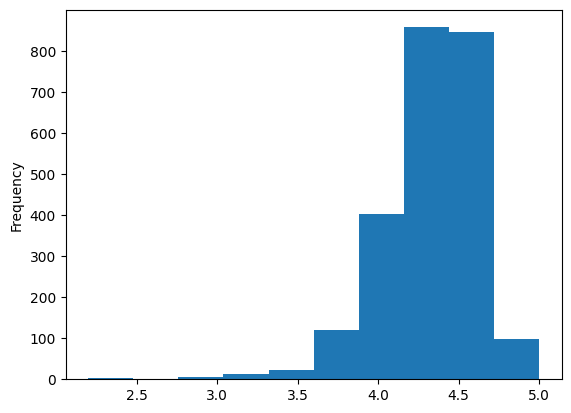

In [11]:
df.Rating.plot.hist();

In [12]:
df.Installs.min() , df.Installs.max()

(100, 1000000000)

<Axes: ylabel='Frequency'>

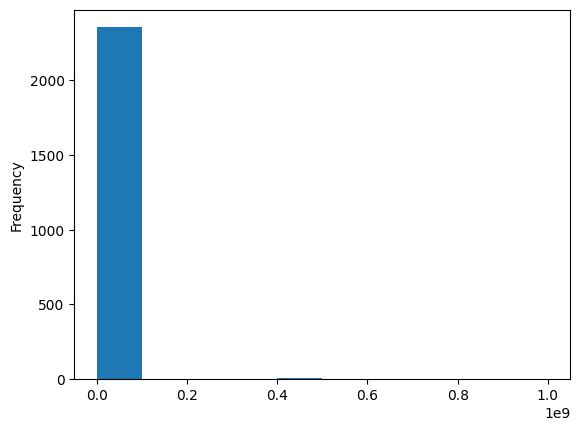

In [13]:
df.Installs.plot.hist()

In [14]:
(df.Rating.values*np.log10(df.Installs.values)).min() , (df.Rating.values*np.log10(df.Installs.values)).max()

(6.6000000000000005, 41.4)

In [15]:
df["target"] = (df.Rating)*(np.log10(df.Installs)) # Target Created
df.drop(columns=["Rating","Installs"],inplace=True)

# Instead of taking Rating or Installs as one target variable we created a combination of those two. Because there is excessive gap between Installs we concluded that taking log
# of Installs 

<Axes: ylabel='Frequency'>

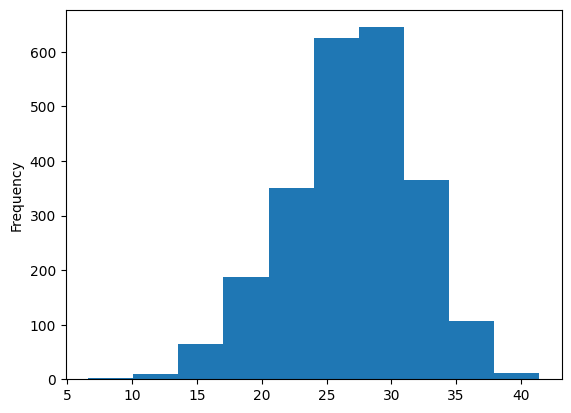

In [16]:
df.target.plot.hist()

## Image Preprocessing

In [17]:
import os
import PIL
from PIL import Image
import pathlib

path = os.getcwd()+"\\data\\icon_png\\"
image_list = os.listdir(path)
full_paths = [path+x for x in image_list]

only_nums = [int(x.replace(".png","")) for x in image_list]
only_nums = np.array(only_nums) # converted to np.array

In [18]:
dictt = {
    "index":only_nums,
    "full_paths": full_paths
}
image_df = pd.DataFrame(dictt)
image_df = image_df.sort_values(by="index",ascending=True).reset_index(drop=True)
image_df.drop(columns=["index"],inplace=True)
image_df.head()

,full_paths
0,c:\Users\erenk\OneDrive\Masaüstü\-Masaustu-\1....
1,c:\Users\erenk\OneDrive\Masaüstü\-Masaustu-\1....
2,c:\Users\erenk\OneDrive\Masaüstü\-Masaustu-\1....
3,c:\Users\erenk\OneDrive\Masaüstü\-Masaustu-\1....
4,c:\Users\erenk\OneDrive\Masaüstü\-Masaustu-\1....


### Control

**Does index of main dataframe matches with image dataframe?**

--------------------------------------------------
Name of the game is:  SNIPER FURY: SHOOTING GAME


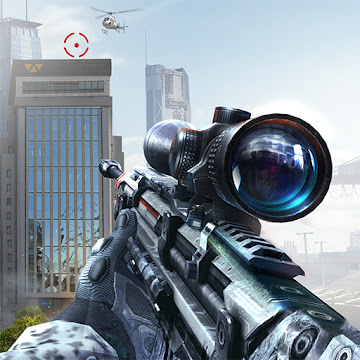

In [19]:
# input 15 for a clear understanding
index = int(input("Write the index from 0 to 2968: " ))
print("-"*50)
print("Name of the game is: ",df.loc[index,"Name"].upper())
PIL.Image.open(image_df.loc[index,"full_paths"])

In [20]:
### Image Representations from Pre-trained model
# (Further Work)
'''
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch

pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 8
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  # Taking the vector instead of captions
  output_ids = model.generate(pixel_values, **gen_kwargs)

  # preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  # preds = [pred.strip() for pred in preds]
  return output_ids
  '''

'\nfrom transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer\nimport torch\n\npip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118\ntorch.device("cuda" if torch.cuda.is_available() else "cpu")\n\nmodel = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")\nfeature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")\ntokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")\n\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nmodel.to(device)\n\nmax_length = 8\nnum_beams = 4\ngen_kwargs = {"max_length": max_length, "num_beams": num_beams}\ndef predict_step(image_paths):\n  images = []\n  for image_path in image_paths:\n    i_image = Image.open(image_path)\n    if i_image.mode != "RGB":\n      i_image = i_image.convert(mode="RGB")\n\n    images.append(i_image)\n\n  pixel_values = feature_extractor(images=images, ret

# Manipulation & Feature Engineering

In [21]:
df.head(2)

,Name,Number_of_Rating,Genre,Price,Description,Updated,Size,Requires_Android,Content_Rating,Offered_By,Interactive_Elements,In_app_Products,In_app_Products_Min,In_app_Products_Max,target
ID,,,,,,,,,,,,,,,
0,Geometry Dash Lite,7227039,Arcade,0.0,Jump and fly your way through danger in this r...,2019-12-11,5.857981,4.0,1,RobTop Games,[No Element],0,NaN,NaN,35.2
1,Fastlane: Road to Revenge,621784,Action,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,6.523562,4.4,2,Space Ape,[Digital Purchases],$0.99 - $99.99,0.99,99.99,32.2


In [22]:
# Name
def fe_Name(str_):
    str_ = str_.translate(str.maketrans('', '', string.punctuation))
    splitted = str_.split()
    
    len_of_words = len(splitted)
    chars = []
    for word in splitted:
        chars.append(len(word))
    avr_chars = np.array(chars).mean()
    return pd.Series([len_of_words, avr_chars])

df[["num_of_word","avg_num_of_chars"]] = df.Name.apply(fe_Name)

# Interactive_Elements
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
ie_labels = pd.DataFrame(mlb.fit_transform(df['Interactive_Elements']), columns=mlb.classes_, index=df.index)
df = pd.concat([df,ie_labels], axis=1)
df.drop(columns=["No Element"], inplace=True)

# last_update
scraping_day = pd.Timestamp(2022, 5, 29)
df["last_update"] = (scraping_day - df.Updated).dt.days
df["last_update_ln"] = np.log(df.last_update)

# In_app_Products
# Maximum, minimum, and mean of the in app products prices calculated as new features
df["In_app_Products_Mean"] = (df["In_app_Products_Max"] - df["In_app_Products_Min"]) / 2
df.In_app_Products_Min.fillna(0,inplace=True)
df.In_app_Products_Max.fillna(0,inplace=True)
df.In_app_Products_Mean.fillna(0,inplace=True)

# Price
# Prices are segmented
df["Free_or_Not"] = np.nan
df["Price_Segment"] = np.nan
for idx,item in df.Price.iteritems():
    # Free_or_Not
    if item>0:
        df.loc[idx,"Free_or_Not"] = 0 # not free
    else:
        df.loc[idx,"Free_or_Not"] = 1 # free
    
    # Segment
    if item==0:
        df.loc[idx,"Price_Segment"] = 0
    elif item <= 6:
        df.loc[idx,"Price_Segment"] = 1
    elif item <= 26:
        df.loc[idx,"Price_Segment"] = 2
    elif item > 26:
        df.loc[idx,"Price_Segment"] = 3

# Taking RGB means as a feature

df[["R_mean","G_mean","B_mean"]] = np.nan
df[["R_std","G_std","B_std"]] = np.nan

for idx in image_df.index:
    current_image = PIL.Image.open(image_df.loc[idx,"full_paths"])
    arr = np.array(current_image)
    c_RGB_mean = np.mean(arr,axis=(0,1))
    df.loc[idx , ["R_mean","G_mean","B_mean"]] = c_RGB_mean

    c_RGB_std = np.std(arr,axis=(0,1))
    df.loc[idx , ["R_std","G_std","B_std"]] = c_RGB_std

C:\Users\erenk\AppData\Local\Temp\ipykernel_8560\1401278077.py:38: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx,item in df.Price.iteritems():


# Exploratory Data Analysis

C:\Users\erenk\AppData\Local\Temp\ipykernel_8560\611515125.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x="B_mean",y="target",palette="green")


<Axes: xlabel='B_mean', ylabel='target'>

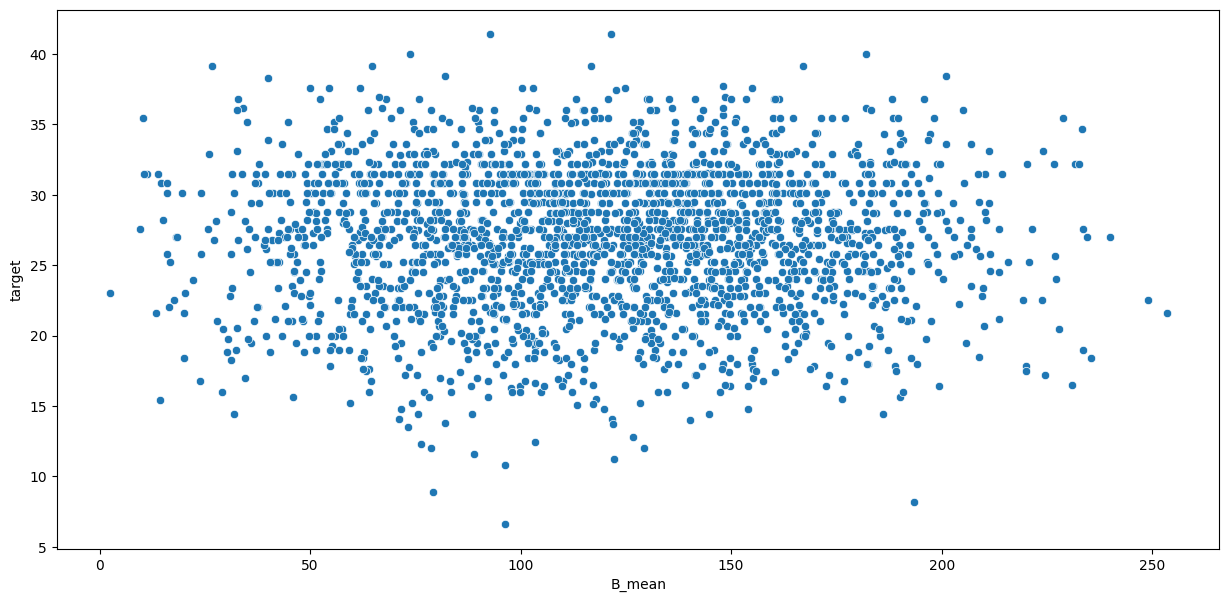

In [23]:
df[["R_mean","G_mean","B_mean","target"]].corr()[["target"]] 
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x="B_mean",y="target",palette="green")
# Not much corrloation between target. Maybe cmbination of them has corrolation

C:\Users\erenk\AppData\Local\Temp\ipykernel_8560\748992825.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df.groupby(by="Price_Segment").mean()[["target"]])


,target
Price_Segment,
0.0,27.723337
1.0,21.300984
2.0,19.764045
3.0,13.686189


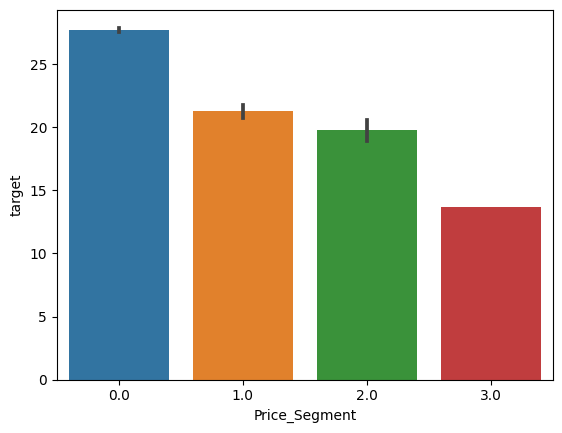

In [24]:
# There is a clear negative correlation between price segment and target which means as the game becomes expensive it preffered less 
display(df.groupby(by="Price_Segment").mean()[["target"]])
sns.barplot(data=df,x="Price_Segment",y="target");

<Axes: xlabel='Free_or_Not', ylabel='target'>

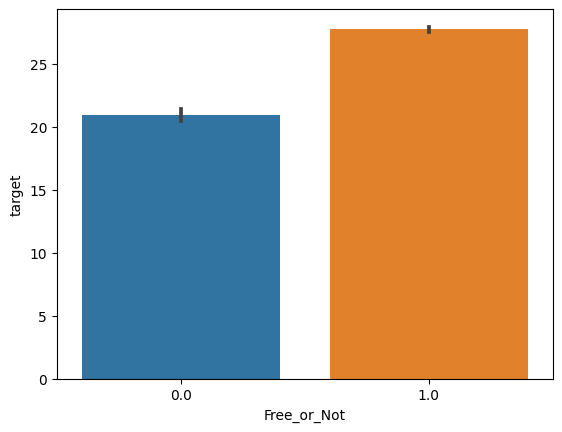

In [25]:
sns.barplot(data=df,x="Free_or_Not",y="target")

## Does Genre affects?

In [26]:
df.groupby(by="Genre").mean()[["target"]]

C:\Users\erenk\AppData\Local\Temp\ipykernel_8560\2161706707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by="Genre").mean()[["target"]]


,target
Genre,
Action,28.311266
Adventure,25.860332
Arcade,28.754699
Board,26.257312
Card,24.968183
Casino,28.167997
Casual,28.828691
Educational,25.730262
Music,24.791415


<Axes: xlabel='Genre', ylabel='target'>

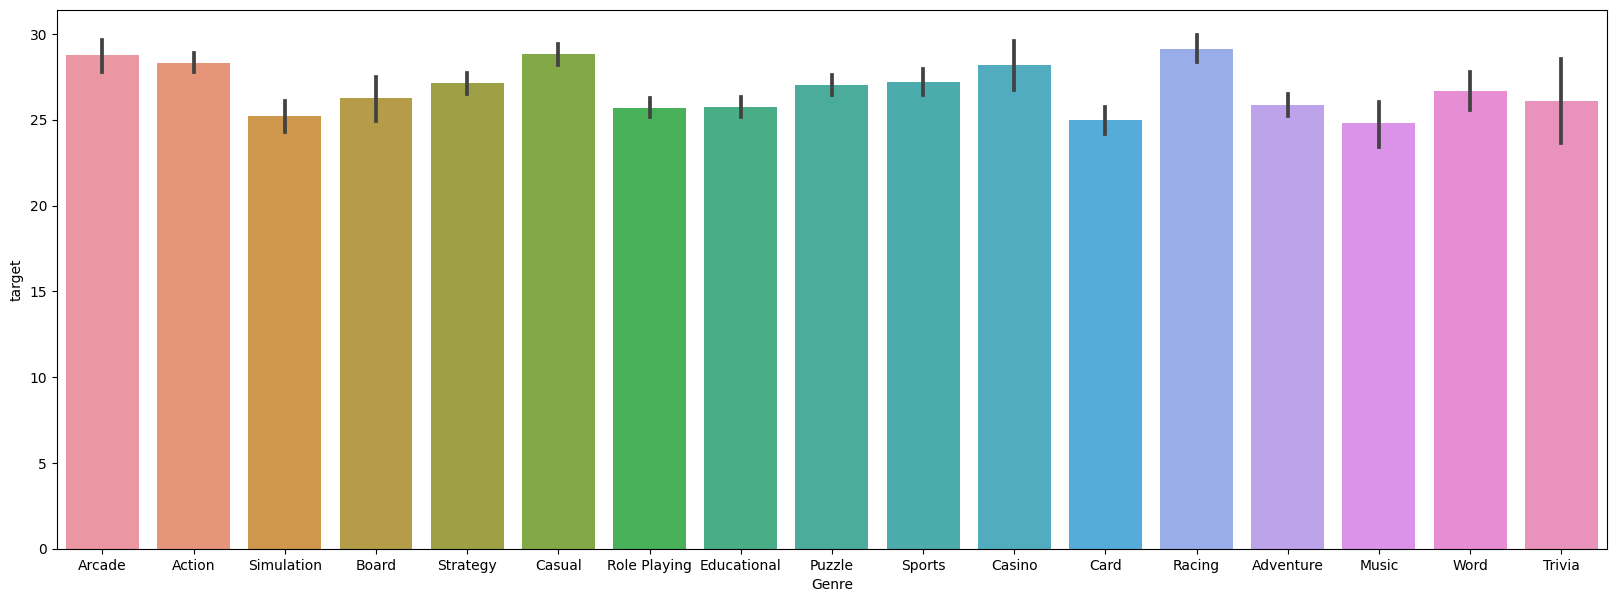

In [27]:
plt.figure(figsize=(20,7))
sns.barplot(data=df , x="Genre",y="target")

# Target encoding can be conducted

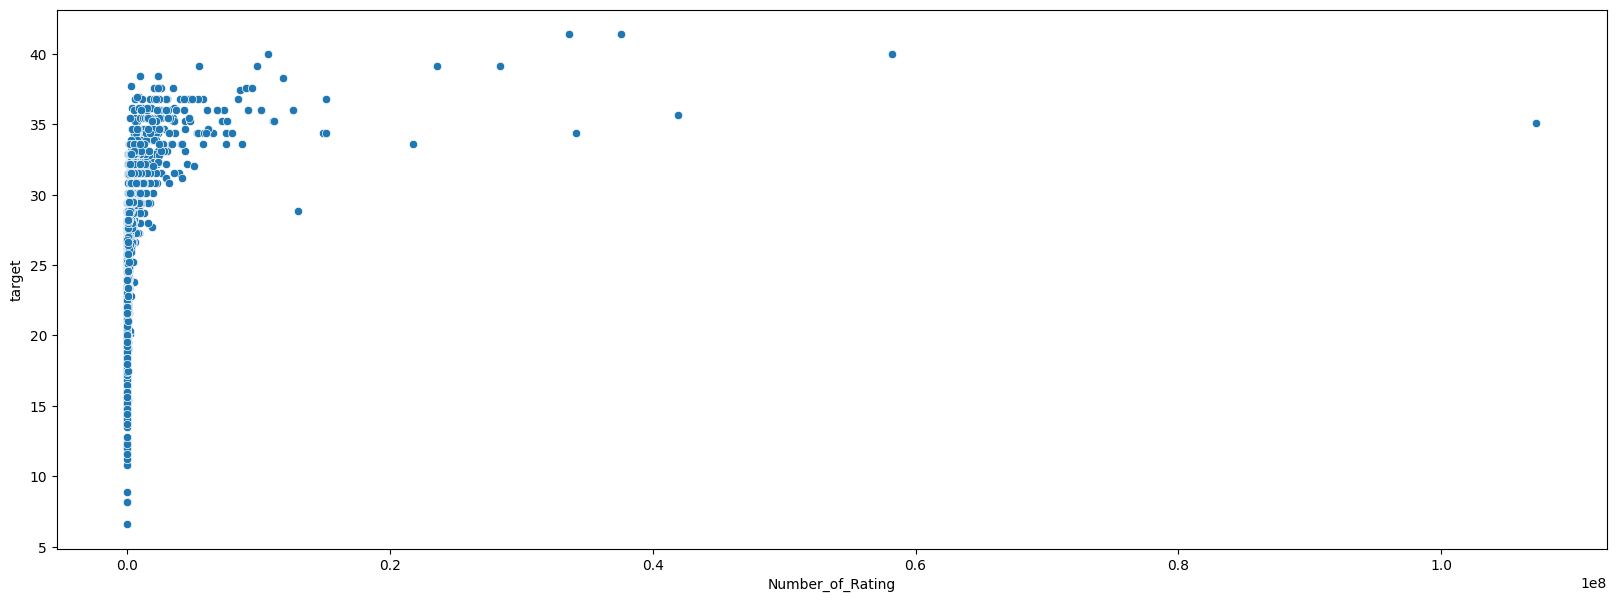

In [28]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=df,x="Number_of_Rating",y="target" )
plt.show()

# As the number of voting of rating is increases
# To prevent leakage, number of total votes will be removed from data

In [30]:
df.to_csv("data/data_pp.csv")